In [4]:
from functies import *
from classes import *
import sympy as sp
import numpy as np

initialised


In [5]:
def snelheidsmodel_pseudosnelheid(t, parameters):
    c_0, k, orde = parameters
    '''
    c_0 = beginconcentratie
    k = pseudosnelheidsconstante
    orde = orde van de reactie
    '''
    if c_0 < 0 or k < 0:
        return np.full(np.shape(t), np.inf)
    if orde == 1:
        c = c_0 * np.exp(-k*t)
    else:
        c = (c_0**(1-orde) - k*(1-orde)*t)**(1/(1-orde))
    return c

def snelheidsmodel_1eorde(t,parameters):
    c_0, k = parameters
    return c_0 * np.exp(-k*t)

def snelheidsmodel_0eorde(t,params):
    c_0, k = params
    return c_0 - k*t



In [49]:
#prepareer de data van de eerste set metingen
absorbanties_set_1 = []
tijd_0 = (10,56)
tijden_set_1 = []
for i in range(36): #alle meetpunten afgaan --let op! het is 0.06, niet 0.006!
    adres = "C:/Users/User/Documents/Cas/Unif/2e can/experimentele/week 12 chemie I/NaOH0.006/NaOH0.006_Absorbance__"+str(i)+'__'+str(i)+'.txt'
    file = open(adres, 'rt')
    tekst = file.read();file.close()
    tekst = tekst.split('590,095	')
    meting = float(tekst[1][:8].replace(',','.'))
    absorbanties_set_1.append(meting)
    
    datum = tekst[0].split('Mon Dec 09 11:')[1][:5]
    minuut = int(datum[:2]);seconde = int(datum[3:])

    tijdsverschil = (minuut-tijd_0[0])*60 + (seconde-tijd_0[1])
    tijden_set_1.append(tijdsverschil)

absorbanties_set_1 = np.array(absorbanties_set_1)
tijden_set_1 = np.array(tijden_set_1)
print(absorbanties_set_1)
print(tijden_set_1)

epsilon = 87000 #M^-1 cm^-1
l = 1 #cm
concentraties_set_1 = -1*absorbanties_set_1/(epsilon*l)

#de data van de Bulgaar/Indiër

data_1=np.array([0.6777,0.61495,0.55706,0.50277,0.45396,0.4072,0.36515,0.32651,0.2922,0.26294,0.23723,0.21136,0.18762,0.16799,0.14923,0.13225,0.11662,0.10335])
data_2=np.array([0.75223,0.71715,0.68048,0.6455,0.61031,0.57533,0.54337,0.51178,0.48297,0.45412,0.4277,0.40186,0.37751,0.3522,0.32759,0.30677,0.28685,0.26855,0.25045])
concentraties_set_1 = data_1
tijden_set_1 = np.array([20*i for i in range(len(data_1))])

fouten_set_1 = 0.02*concentraties_set_1


[-0.80761 -0.79651 -0.78511 -0.7732  -0.76062 -0.74756 -0.73373 -0.71911
 -0.70448 -0.68986 -0.67414 -0.65828 -0.64147 -0.62457 -0.60701 -0.58987
 -0.57121 -0.5526  -0.53256 -0.51357 -0.49425 -0.47574 -0.45788 -0.43929
 -0.42237 -0.40758 -0.39152 -0.37519 -0.35854 -0.34313 -0.32763 -0.31516
 -0.29844 -0.2827  -0.26889 -0.25804]
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350]


Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 44996.28906142553
        x: [ 9.600e-06  2.100e-08  1.000e+00]
      nit: 0
      jac: [-3.865e+05  8.411e+02  1.076e+00]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 24
     njev: 3
[[5.304558274673242e-07, 5.304558274787373e-07], [0.026229019525501756, 0.02622901952522452], [0.5, 76.5]]
c_0 heeft als waarde: 9.6e-06 + -9.0695e-06 - 9.0695e-06 met 68% betrouwbaarheidsinterval: [5.3046e-07, 5.3046e-07] 
k heeft als waarde: 2.1e-08 + 0.026229 - -0.026229 met 68% betrouwbaarheidsinterval: [0.026229, 0.026229] 
orde heeft als waarde: 1 + 75.5 - 0.5 met 68% betrouwbaarheidsinterval: [0.5, 76.5] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0
De gereduceerde chi^2 waarde is: 2999.8
[[9.6e-06, (9.069544172532675e-06, -9.069544172521262e-06), 'S'], [2.1e-08, (-0.026228998525501757, 0.02622899852522452), 'S']

c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\User\AppData\Local\Temp\ipykernel_12896\590510198.py:13: RuntimeWarning: overflow encountered in scalar power
  c = (c_0**(1-orde) - k*(1-orde)*t)**(1/(1-orde))
c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\User\AppData\Local\Temp\ipykernel_12896\590510198.py:13: RuntimeWarning: invalid value encountered in power
  c = (c_0**(1-orde) - k*(1-orde)*t)**(1/(1-orde))


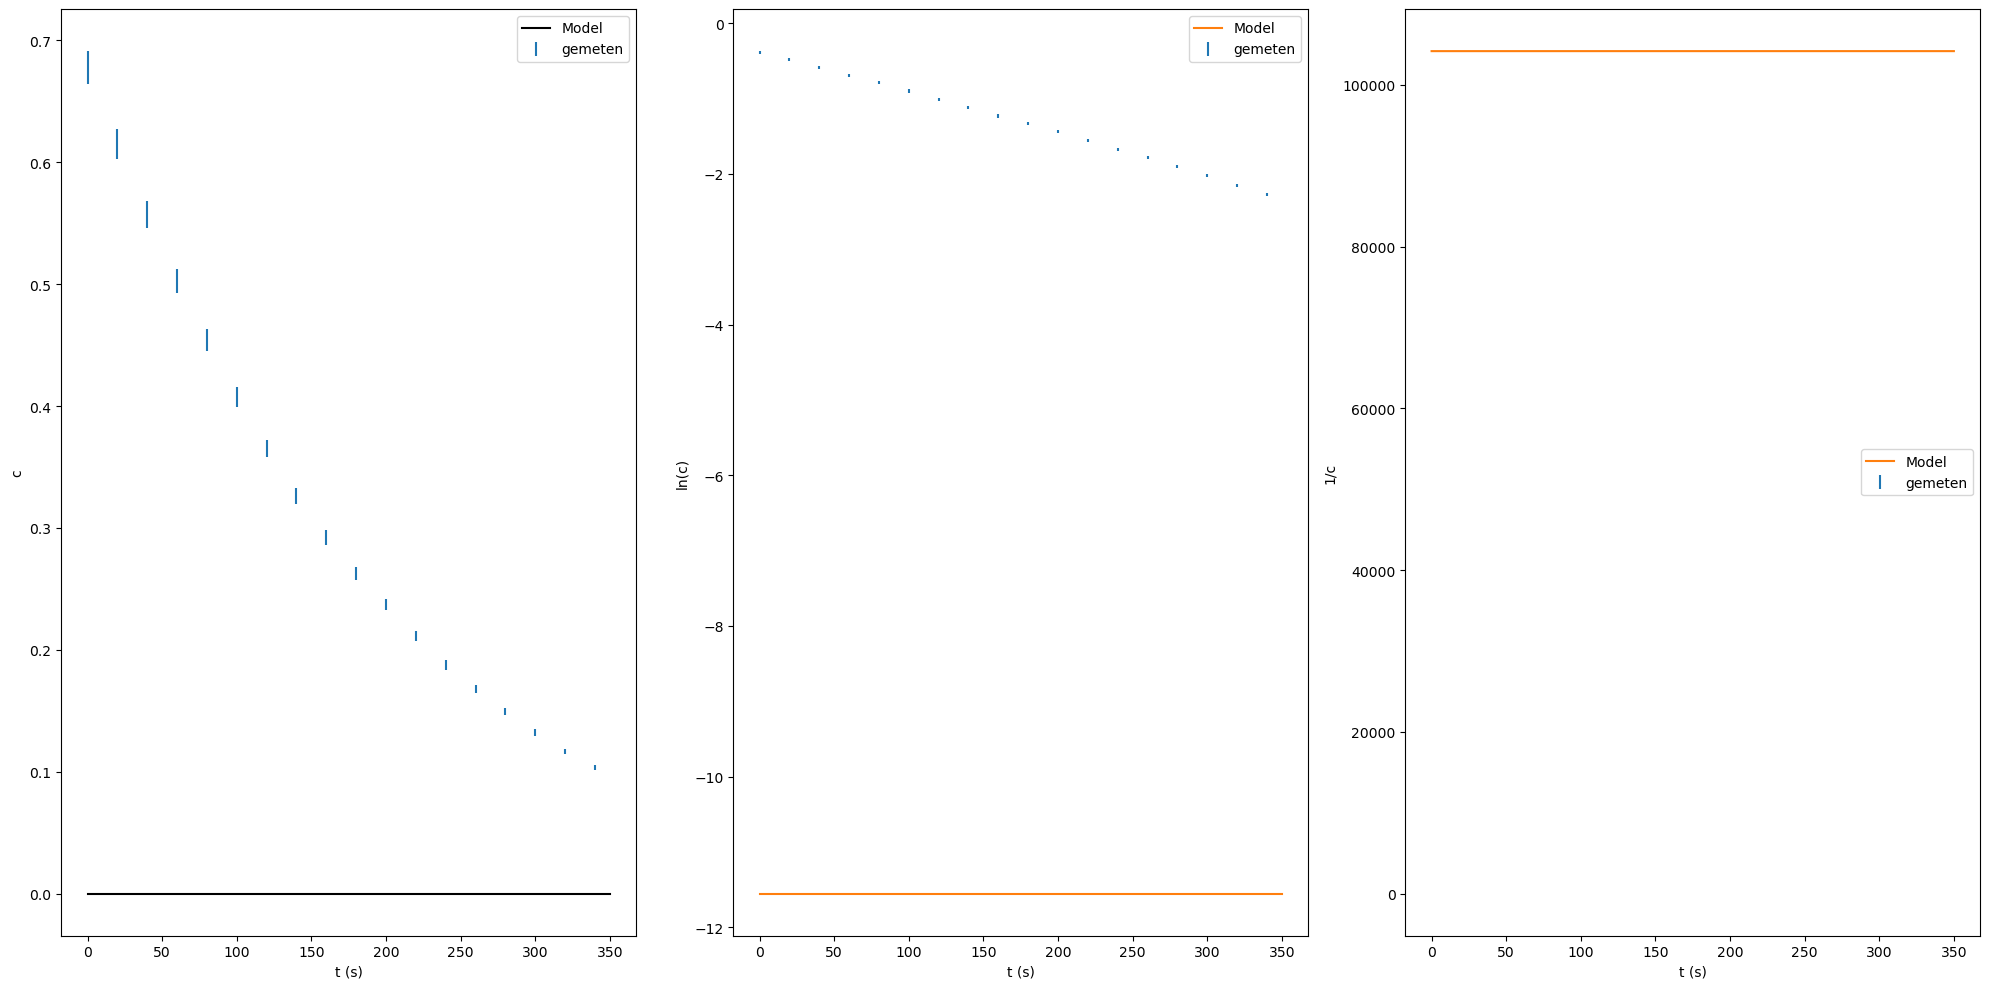

In [50]:
# eerste set metingen: we gokken de orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8, 1]

parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_pseudosnelheid, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
print(outp)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]


fig,ax = plt.subplots(1,3, figsize = (20,10))
ax[0].errorbar(tijden_set_1,concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1)
ax[1].errorbar(tijden_set_1,np.log(concentraties_set_1), linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1)
ax[2].errorbar(tijden_set_1,1/concentraties_set_1, linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1**2)
ax[0].set_ylabel('c')
ax[1].set_ylabel('ln(c)')
ax[2].set_ylabel('1/c')
t = np.linspace(0,350)
ax[0].plot(t, snelheidsmodel_pseudosnelheid(t, parameterwaarden),color = 'black',label = 'Model')
ax[1].plot(t, np.log(snelheidsmodel_pseudosnelheid(t, parameterwaarden)),label = 'Model')
ax[2].plot(t, 1/snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
for i in range(3):
    ax[i].set_xlabel('t (s)')
    ax[i].legend()
plt.tight_layout();plt.show()

Raw output
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 650.326219341196
        x: [ 5.223e-01  1.292e-03]
      nit: 3
      jac: [-7.629e-06 -7.629e-06]
 hess_inv: [[ 6.263e-06  2.167e-08]
            [ 2.167e-08  8.086e-11]]
     nfev: 15
     njev: 5
[[0.5208446829932623, 0.5237260917266069], [0.0012867645220187487, 0.0012971177642790203]]
c_0 heeft als waarde: 0.52229 + 0.0014407 - 0.0014407 met 68% betrouwbaarheidsinterval: [0.52084, 0.52373] 
k heeft als waarde: 0.0012919 + 5.1841e-06 - 5.1692e-06 met 68% betrouwbaarheidsinterval: [0.0012868, 0.0012971] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 4.7332e-128
De gereduceerde chi^2 waarde is: 40.645


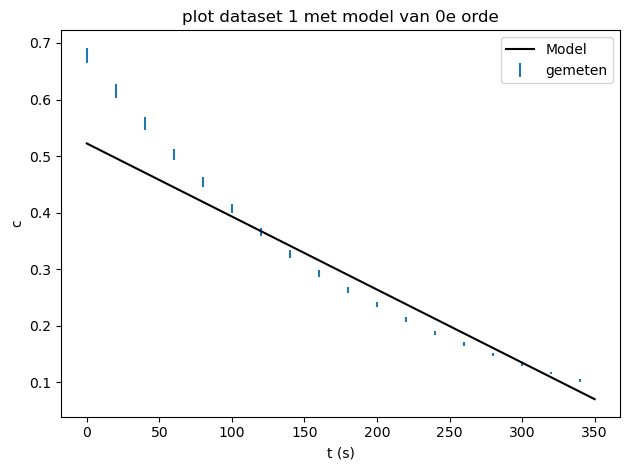

In [51]:
#we zien duidelijk dat het geen 2e orde is dus dat gooien we al weg
# eerste set metingen 0e orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8]


parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_0eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]


fig,ax = plt.subplots(1,1)
ax.errorbar(tijden_set_1,concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1)
ax.set_ylabel('c')
t = np.linspace(0,350)
ax.plot(t, snelheidsmodel_0eorde(t, parameterwaarden),color = 'black',label = 'Model')
ax.set_title('plot dataset 1 met model van 0e orde')
ax.set_xlabel('t (s)')
ax.legend()
plt.tight_layout();plt.show()


Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 13.034618565525863
        x: [ 7.003e-01  5.528e-03]
      nit: 13
      jac: [ 3.576e-07 -9.239e-05]
 hess_inv: [[ 1.944e-05  1.175e-07]
            [ 1.175e-07  9.870e-10]]
     nfev: 183
     njev: 61
[[0.6952680051038511, 0.705235834437126], [0.005493109596151668, 0.005564154999640593]]
c_0 heeft als waarde: 0.70025 + 0.0049839 - 0.0049839 met 68% betrouwbaarheidsinterval: [0.69527, 0.70524] 
k heeft als waarde: 0.0055285 + 3.5697e-05 - 3.5349e-05 met 68% betrouwbaarheidsinterval: [0.0054931, 0.0055642] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.67022
De gereduceerde chi^2 waarde is: 0.81466
[[0.7002519123227708, 0.004983922114355166, 'S'], [0.005528458320166842, 3.569667947375156e-05, 'S']]


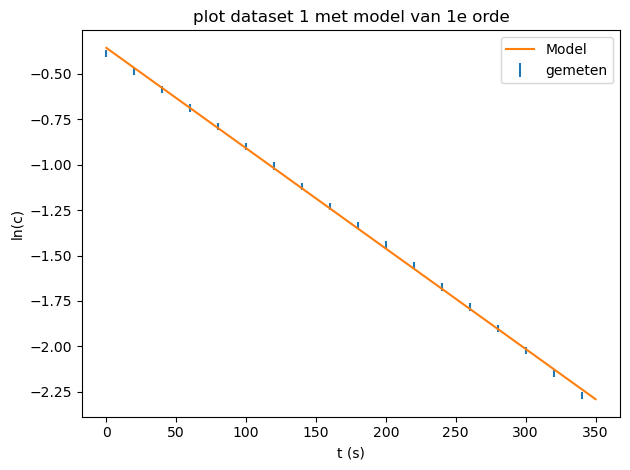

In [52]:
# eerste set metingen: 1e orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8]

parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_1eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
print(outp)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]


fig,ax = plt.subplots(1,1)
ax.errorbar(tijden_set_1,np.log(concentraties_set_1), linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1)
ax.set_ylabel('ln(c)')
t = np.linspace(0,350)
ax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model')
ax.set_title('plot dataset 1 met model van 1e orde')
ax.set_xlabel('t (s)')
ax.legend()
plt.tight_layout();plt.show()

In [23]:
#prepareer de data van de tweede set metingen
absorbanties_set_2 = []
tijd_0 = (26,16)
tijden_set_2 = []
for i in range(36): #alle meetpunten afgaan --let op! het is 0.06, niet 0.006!
    if i >= 10:
        numstring = str(i)
    else:
        numstring = '0'+str(i)
    adres = "C:/Users/User/Documents/Cas/Unif/2e can/experimentele/week 12 chemie I/NaOH0.03/0.03MnaOh_Absorbance__"+str(i)+'__000'+numstring+'.txt'
    file = open(adres, 'rt')
    tekst = file.read();file.close()
    tekst = tekst.split('590,095	')

    meting = float(tekst[1][:6].replace(',','.'))
    absorbanties_set_2.append(meting)
    
    datum = tekst[0].split('Mon Dec 09 11:')[1][:5]
    minuut = int(datum[:2]);seconde = int(datum[3:])

    tijdsverschil = (minuut-tijd_0[0])*60 + (seconde-tijd_0[1])
    tijden_set_2.append(tijdsverschil)

absorbanties_set_2 = np.array(absorbanties_set_2)
tijden_set_2 = np.array(tijden_set_2)
print(absorbanties_set_2)
print(tijden_set_2)

epsilon = 87000 #M^-1 cm^-1
l = 1 #cm
concentraties_set_2 = absorbanties_set_2/(epsilon*l)
tijden_set_2 = tijden_set_2

fouten_set_2  = 0.02*concentraties_set_2 

[0.9762 0.9498 0.9247 0.8993 0.8751 0.8512 0.827  0.8043 0.7809 0.7593
 0.7382 0.7164 0.695  0.6754 0.6554 0.6357 0.6181 0.5984 0.5816 0.5629
 0.5461 0.5287 0.5104 0.4925 0.4771 0.4635 0.4489 0.4332 0.4186 0.4046
 0.3895 0.3753 0.3612 0.3479 0.3372 0.3265]
[  0  10  20  29  39  49  59  69  80  90  99 110 119 129 139 149 159 170
 179 189 199 209 219 229 239 249 260 270 279 289 299 309 320 329 339 349]


Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 182.07866694096967
        x: [ 1.087e-05  2.100e-08  0.000e+00]
      nit: 0
      jac: [ 8.537e+08  2.275e+12  3.739e+04]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 24
     njev: 3
[[1.053847299076425e-05, 1.0874238773370221e-05], [2.0977633751445322e-08, 2.1961832116657693e-08], [9.157494749897354e-05, 9.157494749897354e-05]]
c_0 heeft als waarde: 1.087e-05 + 4.2388e-09 - 3.3153e-07 met 68% betrouwbaarheidsinterval: [1.0538e-05, 1.0874e-05] 
k heeft als waarde: 2.1e-08 + 9.6183e-10 - 2.2366e-11 met 68% betrouwbaarheidsinterval: [2.0978e-08, 2.1962e-08] 
orde heeft als waarde: 0 + 9.1575e-05 - -9.1575e-05 met 68% betrouwbaarheidsinterval: [9.1575e-05, 9.1575e-05] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 1.5665e-22
De gereduceerde chi^2 waarde is: 5.5175


c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


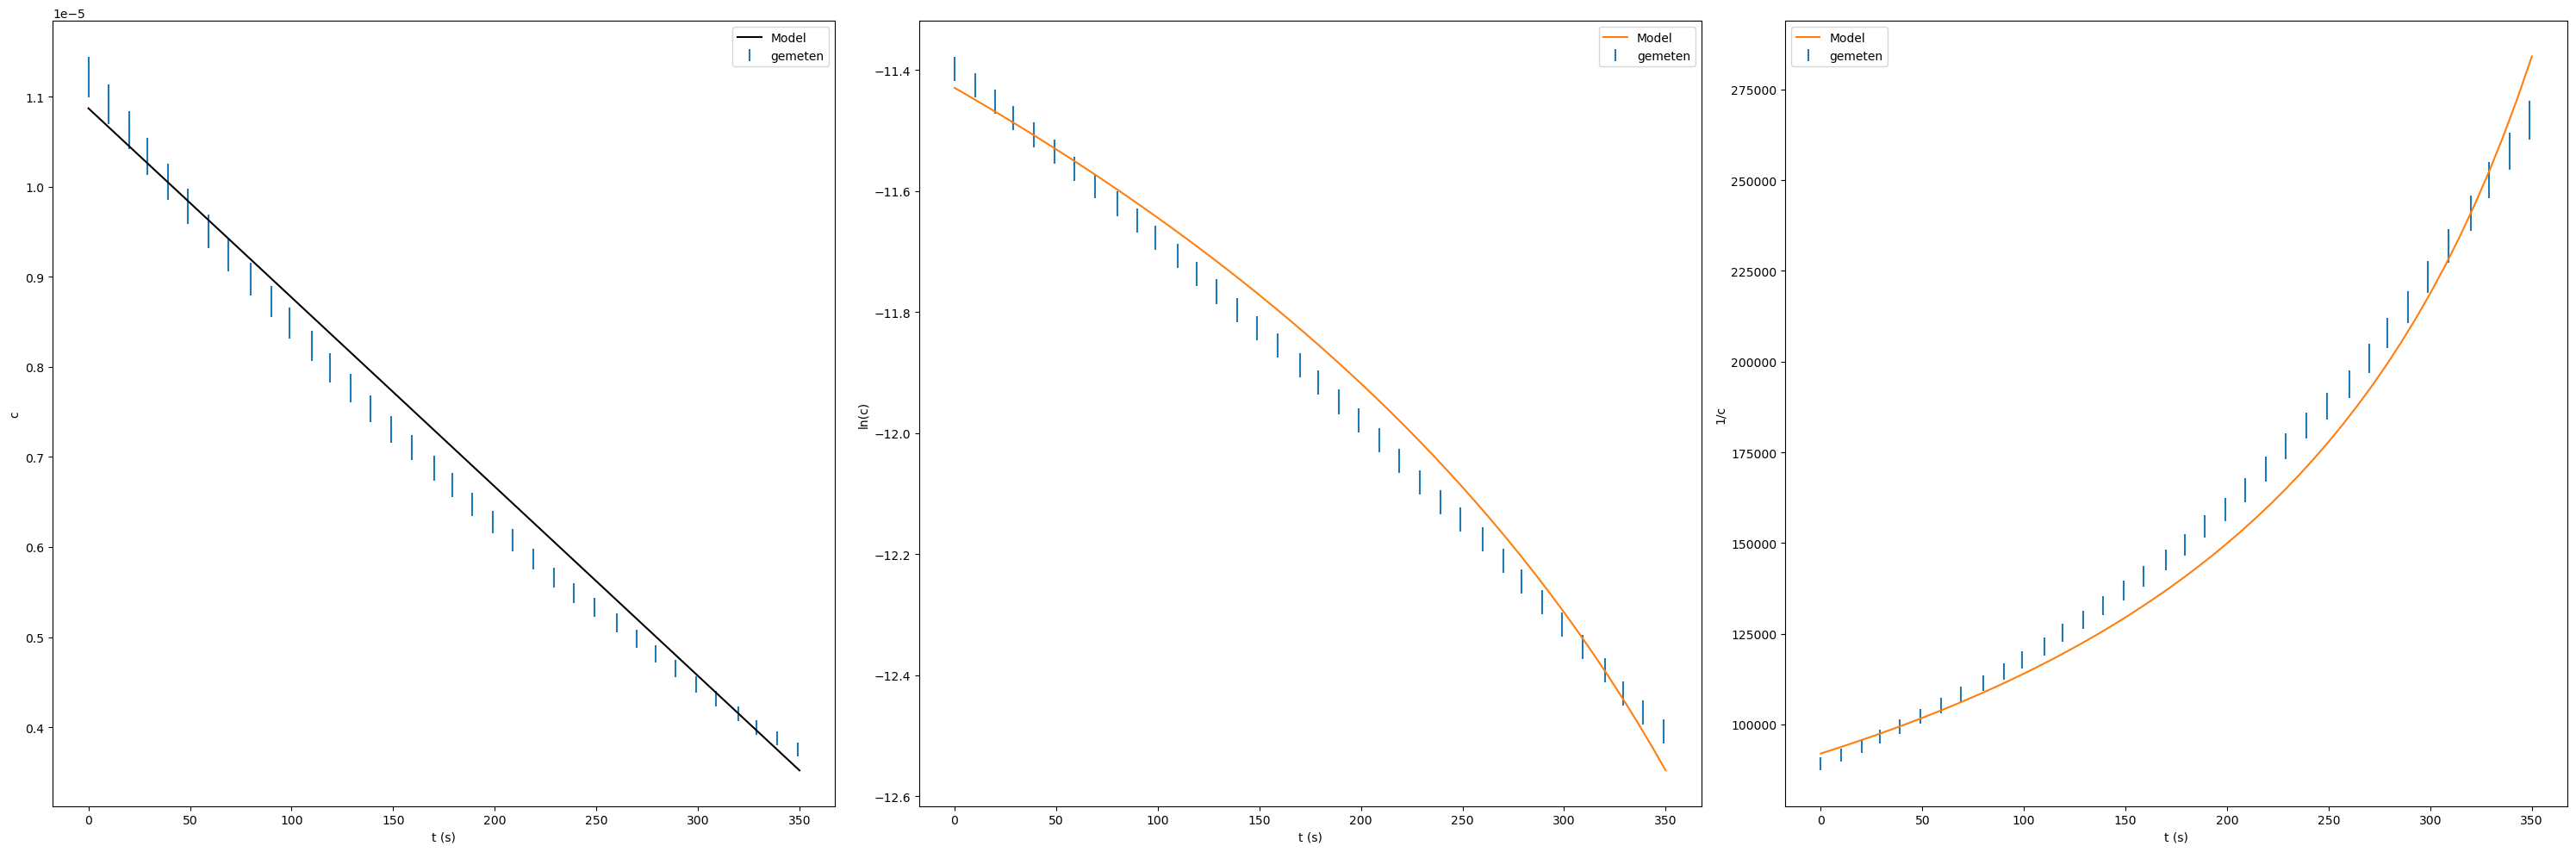

In [27]:
# tweede set metingen: we bepalen de orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8, 0]


parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_pseudosnelheid, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2 )
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]

fig,ax = plt.subplots(1,3, figsize = (30,10))
ax[0].errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 )
ax[1].errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2 )
ax[2].errorbar(tijden_set_2,1/concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 /(concentraties_set_2 **2))
ax[0].set_ylabel('c')
ax[1].set_ylabel('ln(c)')
ax[2].set_ylabel('1/c')
t = np.linspace(0,350)
ax[0].plot(t, snelheidsmodel_pseudosnelheid(t, parameterwaarden),color = 'black',label = 'Model')
ax[1].plot(t, np.log(snelheidsmodel_pseudosnelheid(t, parameterwaarden)),label = 'Model')
ax[2].plot(t, 1/snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
for i in range(3):
    ax[i].set_xlabel('t (s)')
    ax[i].legend()
plt.tight_layout();plt.show()

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 182.07866694096967
        x: [ 1.087e-05  2.100e-08]
      nit: 0
      jac: [ 8.537e+08  2.275e+12]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 183
     njev: 57
[[1.0539944225344052e-05, 1.0872767538790419e-05], [2.0985344164366197e-08, 2.1954121703736815e-08]]
c_0 heeft als waarde: 1.087e-05 + 2.7675e-09 - 3.3006e-07 met 68% betrouwbaarheidsinterval: [1.054e-05, 1.0873e-05] 
k heeft als waarde: 2.1e-08 + 9.5412e-10 - 1.4656e-11 met 68% betrouwbaarheidsinterval: [2.0985e-08, 2.1954e-08] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 3.7317e-22
De gereduceerde chi^2 waarde is: 5.3553


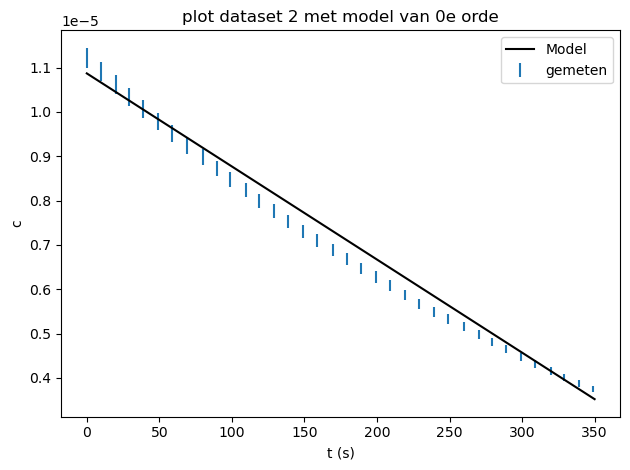

In [41]:
# tweede set metingen: 0e orde en 1e orde want we zien duidelijk dat het geen tweede orde is
#0e orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8]


parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_0eorde, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2 )
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
fig,ax = plt.subplots(1,1)
ax.errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 )
ax.set_ylabel('c')
t = np.linspace(0,350)
ax.plot(t, snelheidsmodel_0eorde(t, parameterwaarden),color = 'black',label = 'Model')
ax.set_xlabel('t (s)')
ax.set_title('plot dataset 2 met model van 0e orde')
ax.legend()
plt.tight_layout();plt.show()

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 19.027798029061035
        x: [ 1.148e-05  3.123e-03]
      nit: 12
      jac: [ 2.327e-02 -6.247e-05]
 hess_inv: [[ 2.734e-15  9.998e-13]
            [ 9.998e-13  4.992e-10]]
     nfev: 180
     njev: 56
[[1.1425166943266684e-05, 1.1541704436844565e-05], [0.003098031096462057, 0.0031473863542347052]]
c_0 heeft als waarde: 1.1476e-05 + 6.5719e-08 - 5.0818e-08 met 68% betrouwbaarheidsinterval: [1.1425e-05, 1.1542e-05] 
k heeft als waarde: 0.0031226 + 2.4766e-05 - 2.4589e-05 met 68% betrouwbaarheidsinterval: [0.003098, 0.0031474] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.98205
De gereduceerde chi^2 waarde is: 0.55964


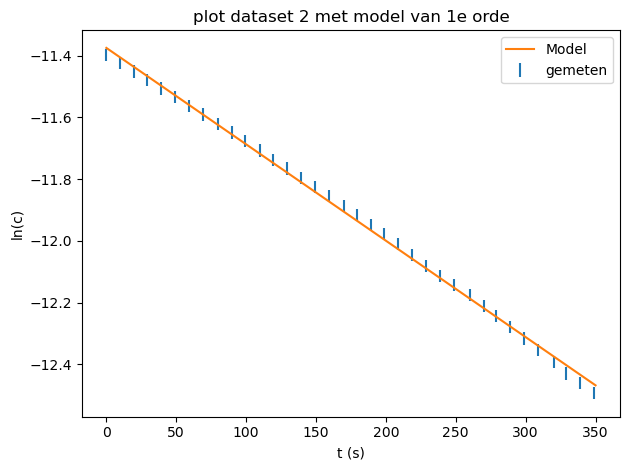

In [43]:
# tweede set metingen: 0e orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8]


parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_1eorde, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2 )
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]

fig,ax = plt.subplots(1,1)
ax.errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2 )
ax.set_ylabel('ln(c)')
t = np.linspace(0,350)
ax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model')
ax.set_title('plot dataset 2 met model van 1e orde')
ax.set_xlabel('t (s)')
ax.legend()
plt.tight_layout();plt.show()

In [40]:
#bepaling van de orde van NaOH

###waarden uit de vorige metingen: ###aanpassen zodra de orde gefixt is
K1 = [1.9133e-08, 3.8884e-10, 'S']
K2 = [0.0031226, 2.4766e-05, 'S']
#eventueel, indien een fout op concentratie NaOH geweten aanpassen
C1 = 0.060 #molair
C2 = 0.030 #molair

meetwaarden = [K1, K2]
#berekeningen:
k1, k2 = sp.symbols('k1 k2')
parameters = (k1, k2)


n = sp.log(k1/k2)/sp.log(C1, C2)

orde_NaOH = data_analyse(n, [k1,k2], [K1, K2])
_ = latex_print_meting(orde_NaOH, 'n_{NaOH}')
#ja lol da's dus duidelijk niet waar

$n_{NaOH} = (-1496.00000000000 \pm 2.7)\cdot 10^{-2}$
